In [ ]:
#load downloaded dataset from drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import rrequired libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

In [ ]:
reviews_df=pd.read_csv('/content/gdrive/MyDrive/travel_ratings/google_review_ratings.csv')

Data preparation

This Travel Review Ratings dataset is taken from UCI machine learning repository contains information about user ratings from Google reviews from 24 place categories across Europe. The Google user ratings ranges from 1 to 5 and average user rating for each categories is used as values.

Attribute Information:

Attribute 1 : Unique user id

Attribute 2 : Average ratings on churches

Attribute 3 : Average ratings on resorts

Attribute 4 : Average ratings on beaches

Attribute 5 : Average ratings on parks

Attribute 6 : Average ratings on theatres

Attribute 7 : Average ratings on museums

Attribute 8 : Average ratings on malls

Attribute 9 : Average ratings on zoo

Attribute 10 : Average ratings on restaurants

Attribute 11 : Average ratings on pubs/bars

Attribute 12 : Average ratings on local services

Attribute 13 : Average ratings on burger/pizza shops

Attribute 14 : Average ratings on hotels/other lodgings

Attribute 15 : Average ratings on juice bars

Attribute 16 : Average ratings on art galleries

Attribute 17 : Average ratings on dance clubs

Attribute 18 : Average ratings on swimming pools

Attribute 19 : Average ratings on gyms

Attribute 20 : Average ratings on bakeries

Attribute 21 : Average ratings on beauty & spas

Attribute 22 : Average ratings on cafes

Attribute 23 : Average ratings on view points

Attribute 24 : Average ratings on monuments

Attribute 25 : Average ratings on gardens

In [ ]:
reviews_df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
reviews_df.shape

(5456, 26)

In [ ]:
#summary of dataset
reviews_df.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5455.000000,2.000000
mean,1.455720,2.319707,2.489331,2.796886,2.958941,2.89349,3.351395,2.540795,3.126019,2.832729,...,1.192801,0.949203,0.822414,0.969811,1.000071,0.965838,1.750537,1.531453,1.560755,1.810000
std,0.827604,1.421438,1.247815,1.309159,1.339056,1.28240,1.413492,1.111391,1.356802,1.307665,...,1.107005,0.973536,0.947911,1.203972,1.193891,0.929853,1.598734,1.316889,1.171756,1.088944
min,0.000000,0.000000,0.000000,0.830000,1.120000,1.11000,1.120000,0.860000,0.840000,0.810000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.040000
25%,0.920000,1.360000,1.540000,1.730000,1.770000,1.79000,1.930000,1.620000,1.800000,1.640000,...,0.690000,0.580000,0.530000,0.520000,0.540000,0.570000,0.740000,0.790000,0.880000,1.425000
50%,1.340000,1.905000,2.060000,2.460000,2.670000,2.68000,3.230000,2.170000,2.800000,2.680000,...,0.800000,0.740000,0.690000,0.690000,0.690000,0.760000,1.030000,1.070000,1.290000,1.810000
75%,1.810000,2.682500,2.740000,4.092500,4.312500,3.84000,5.000000,3.190000,5.000000,3.530000,...,1.160000,0.910000,0.840000,0.860000,0.860000,1.000000,2.070000,1.560000,1.660000,2.195000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.580000


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User         5456 non-null   object 
 1   Category 1   5456 non-null   float64
 2   Category 2   5456 non-null   float64
 3   Category 3   5456 non-null   float64
 4   Category 4   5456 non-null   float64
 5   Category 5   5456 non-null   float64
 6   Category 6   5456 non-null   float64
 7   Category 7   5456 non-null   float64
 8   Category 8   5456 non-null   float64
 9   Category 9   5456 non-null   float64
 10  Category 10  5456 non-null   float64
 11  Category 11  5456 non-null   object 
 12  Category 12  5455 non-null   float64
 13  Category 13  5456 non-null   float64
 14  Category 14  5456 non-null   float64
 15  Category 15  5456 non-null   float64
 16  Category 16  5456 non-null   float64
 17  Category 17  5456 non-null   float64
 18  Category 18  5456 non-null   float64
 19  Catego

Data preprocessing

In [ ]:
#check for missing values
reviews_df.isnull().sum()

User              0
Category 1        0
Category 2        0
Category 3        0
Category 4        0
Category 5        0
Category 6        0
Category 7        0
Category 8        0
Category 9        0
Category 10       0
Category 11       0
Category 12       1
Category 13       0
Category 14       0
Category 15       0
Category 16       0
Category 17       0
Category 18       0
Category 19       0
Category 20       0
Category 21       0
Category 22       0
Category 23       0
Category 24       1
Unnamed: 25    5454
dtype: int64

In [ ]:
#since almost all the instances are null for ctaegory 25,drop that column
reviews_df.drop(['Unnamed: 25'],axis=1,inplace=True)
print(reviews_df.columns)

#replace the null values with 0
reviews_df=reviews_df.fillna(0)
reviews_df.isnull().sum()

Index(['User', 'Category 1', 'Category 2', 'Category 3', 'Category 4',
       'Category 5', 'Category 6', 'Category 7', 'Category 8', 'Category 9',
       'Category 10', 'Category 11', 'Category 12', 'Category 13',
       'Category 14', 'Category 15', 'Category 16', 'Category 17',
       'Category 18', 'Category 19', 'Category 20', 'Category 21',
       'Category 22', 'Category 23', 'Category 24'],
      dtype='object')


User           0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64

In [ ]:
#renaming the columns according to the category names
reviews_df.columns=['user_id','churches','resorts','beaches','parks','theatres','museums','malls','zoo','restaurants','pubs/bars','local services','burger/pizza shops','hotels/other lodgings','juice bars','art galleries','dance clubs','swimming pools','gyms','bakeries','beauty & spas','cafes','view points','monuments','gardens']
reviews_df.columns

Index(['user_id', 'churches', 'resorts', 'beaches', 'parks', 'theatres',
       'museums', 'malls', 'zoo', 'restaurants', 'pubs/bars', 'local services',
       'burger/pizza shops', 'hotels/other lodgings', 'juice bars',
       'art galleries', 'dance clubs', 'swimming pools', 'gyms', 'bakeries',
       'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens'],
      dtype='object')

In [ ]:
reviews_df.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs/bars                float64
local services            object
burger/pizza shops       float64
hotels/other lodgings    float64
juice bars               float64
art galleries            float64
dance clubs              float64
swimming pools           float64
gyms                     float64
bakeries                 float64
beauty & spas            float64
cafes                    float64
view points              float64
monuments                float64
gardens                  float64
dtype: object

In [ ]:
#converting local services rating to float64
# reviews_df['local services'].astype('float64')
#it can be seen that there is a string value in local services column
#check for string vallues in that column
reviews_df['local services'][reviews_df['local services'] == '2\t2.']

2712    2\t2.
Name: local services, dtype: object

In [ ]:
#replace the string value in local services column with the mean value of that column

#calculate mean of other samples
loc_ser_mean_dat=reviews_df['local services'][reviews_df['local services'] != '2\t2.']
reviews_df['local services'][reviews_df['local services'] == '2\t2.']=np.mean(loc_ser_mean_dat.astype('float64'))
reviews_df['local services']=reviews_df['local services'].astype('float64')

In [ ]:
reviews_df.dtypes

user_id                   object
churches                 float64
resorts                  float64
beaches                  float64
parks                    float64
theatres                 float64
museums                  float64
malls                    float64
zoo                      float64
restaurants              float64
pubs/bars                float64
local services           float64
burger/pizza shops       float64
hotels/other lodgings    float64
juice bars               float64
art galleries            float64
dance clubs              float64
swimming pools           float64
gyms                     float64
bakeries                 float64
beauty & spas            float64
cafes                    float64
view points              float64
monuments                float64
gardens                  float64
dtype: object

Exploratory Data Analysis

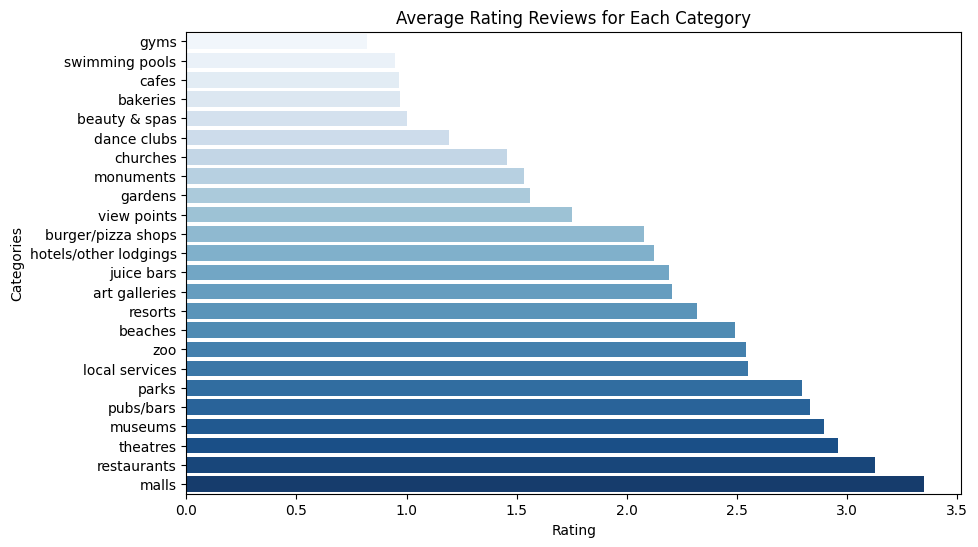

In [ ]:
#visualize the average review ratings for each category
plt.figure(figsize=(10, 6))
reviews_count=reviews_df[reviews_df.columns[1:]].mean().sort_values()
sns.barplot(x=reviews_count.values, y=np.arange(len(reviews_df.columns[1:])),palette='Blues',orient='h')
plt.yticks(np.arange(len(reviews_df.columns[1:])), reviews_count.index)
plt.title("Average Rating Reviews for Each Category")
plt.xlabel("Rating")
plt.ylabel("Categories")
plt.show()

In [ ]:
#check for duplicates
reviews_df.duplicated().sum()

0

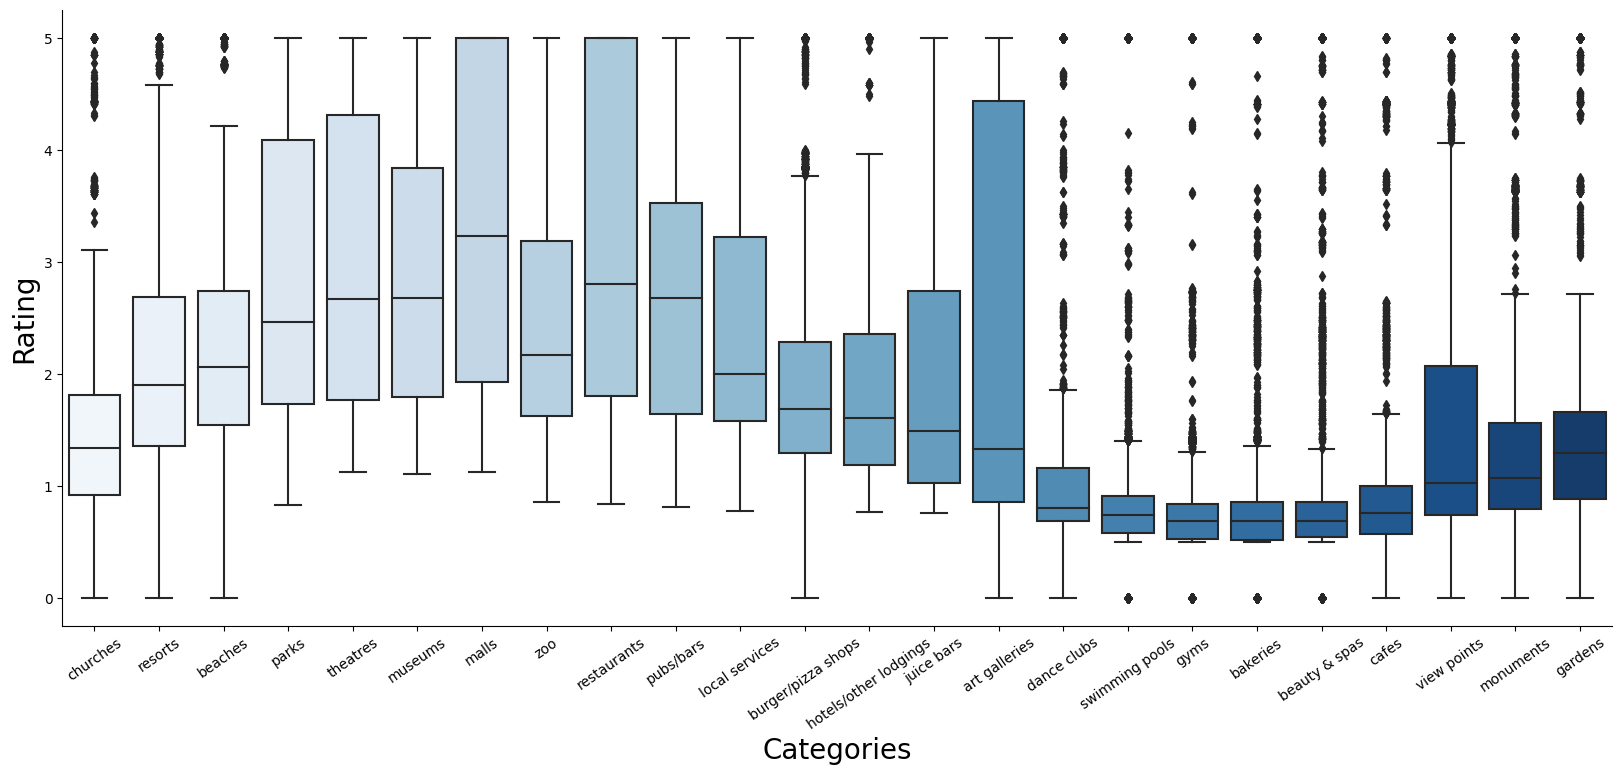

In [ ]:
#check for outliers because it is important to be watched out when scaling our data
cat_df=reviews_df.drop(['user_id'],axis=1)

boxplot = plt.subplots(figsize=(20, 8))

boxplot = sns.boxplot(data= cat_df, palette="Blues")

sns.despine()
boxplot.set_xlabel('Categories', fontsize = 20)
boxplot.set_ylabel('Rating', fontsize = 20)

plt.xticks(rotation= 35)
plt.show()


<Axes: >

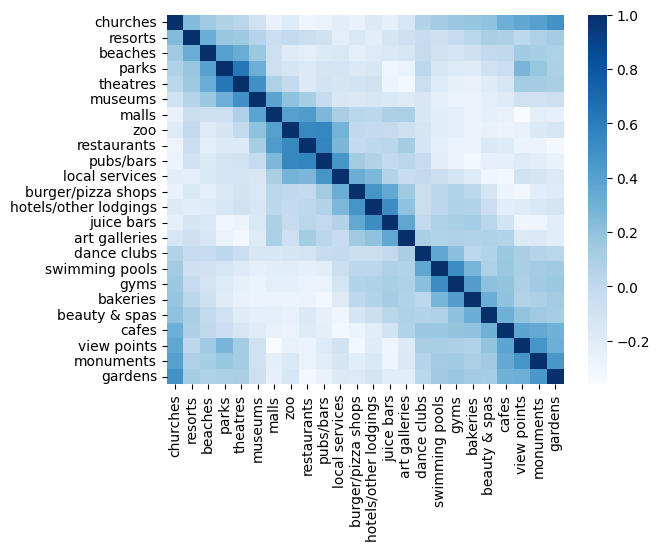

In [ ]:
#checking correlation between categories
rev_corr=cat_df.corr()
sns.heatmap(rev_corr,cmap='Blues')

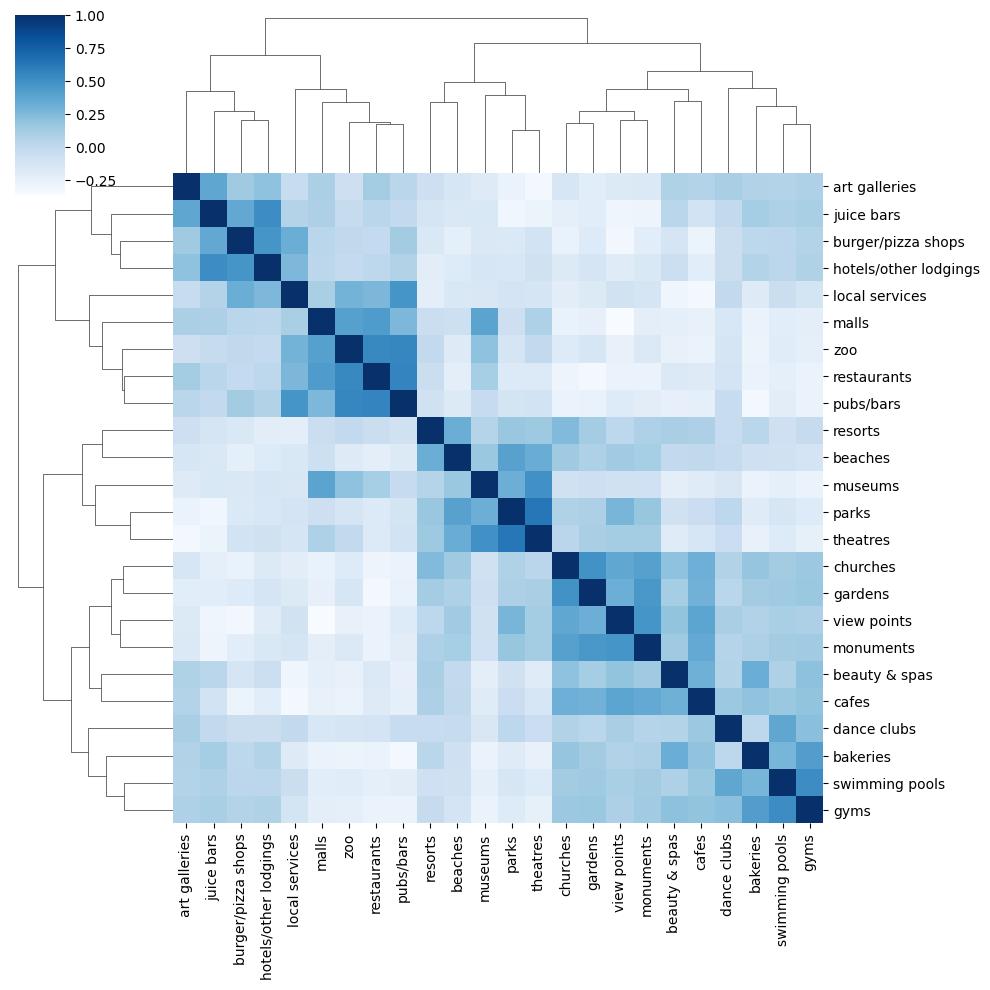

In [ ]:
sns.clustermap(rev_corr,cmap='Blues')

This shows that the categories are clustered togeteher with each other.

Clustering

K-means clustering

In [ ]:
cols=['churches', 'resorts', 'beaches', 'parks', 'theatres', 'museums',
       'malls', 'zoo', 'restaurants', 'pubs/bars', 'local services',
       'burger/pizza shops', 'hotels/other lodgings', 'juice bars',
       'art galleries', 'dance clubs', 'swimming pools', 'gyms', 'bakeries',
       'beauty & spas', 'cafes', 'view points', 'monuments', 'gardens']

In [ ]:
#scaling the data
reviews_scaled_df=StandardScaler().fit_transform(reviews_df.loc[:,cols])
pca=PCA(n_components = 2,random_state=42)
reviews_scaled_pca_df=pca.fit_transform(reviews_scaled_df)

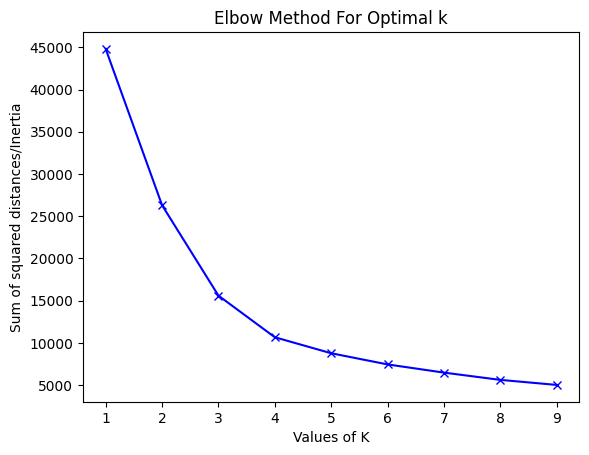

In [ ]:
#determine number of clusters needed using Elbow Curve method
k_list=list(range(1,10))
inertia=[]
for k in k_list:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(reviews_scaled_pca_df)
  inertia.append(kmeans.inertia_)

plt.plot(k_list,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

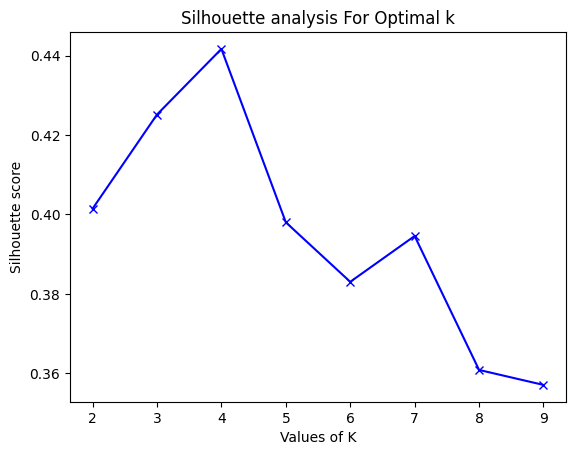

In [ ]:
#perform Silhouette analysis
k_list=list(range(2,10))
silhouette_avg = []
for k in k_list:
  kmeans=KMeans(n_clusters=k,random_state=42)
  kmeans.fit(reviews_scaled_pca_df)
  cluster_labels = kmeans.labels_
  # silhouette score
  silhouette_avg.append(silhouette_score(reviews_scaled_pca_df, cluster_labels))
plt.plot(k_list,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

It can be seen that the silhouette score is maximized at k=4. With combination with the Elbow method it can be confirmed that the optimal number of clusters is 4.

In [ ]:
kmeans_model=KMeans(n_clusters=4,random_state=42)
kmeans_model.fit_transform(reviews_scaled_pca_df)
cluster=kmeans_model.labels_

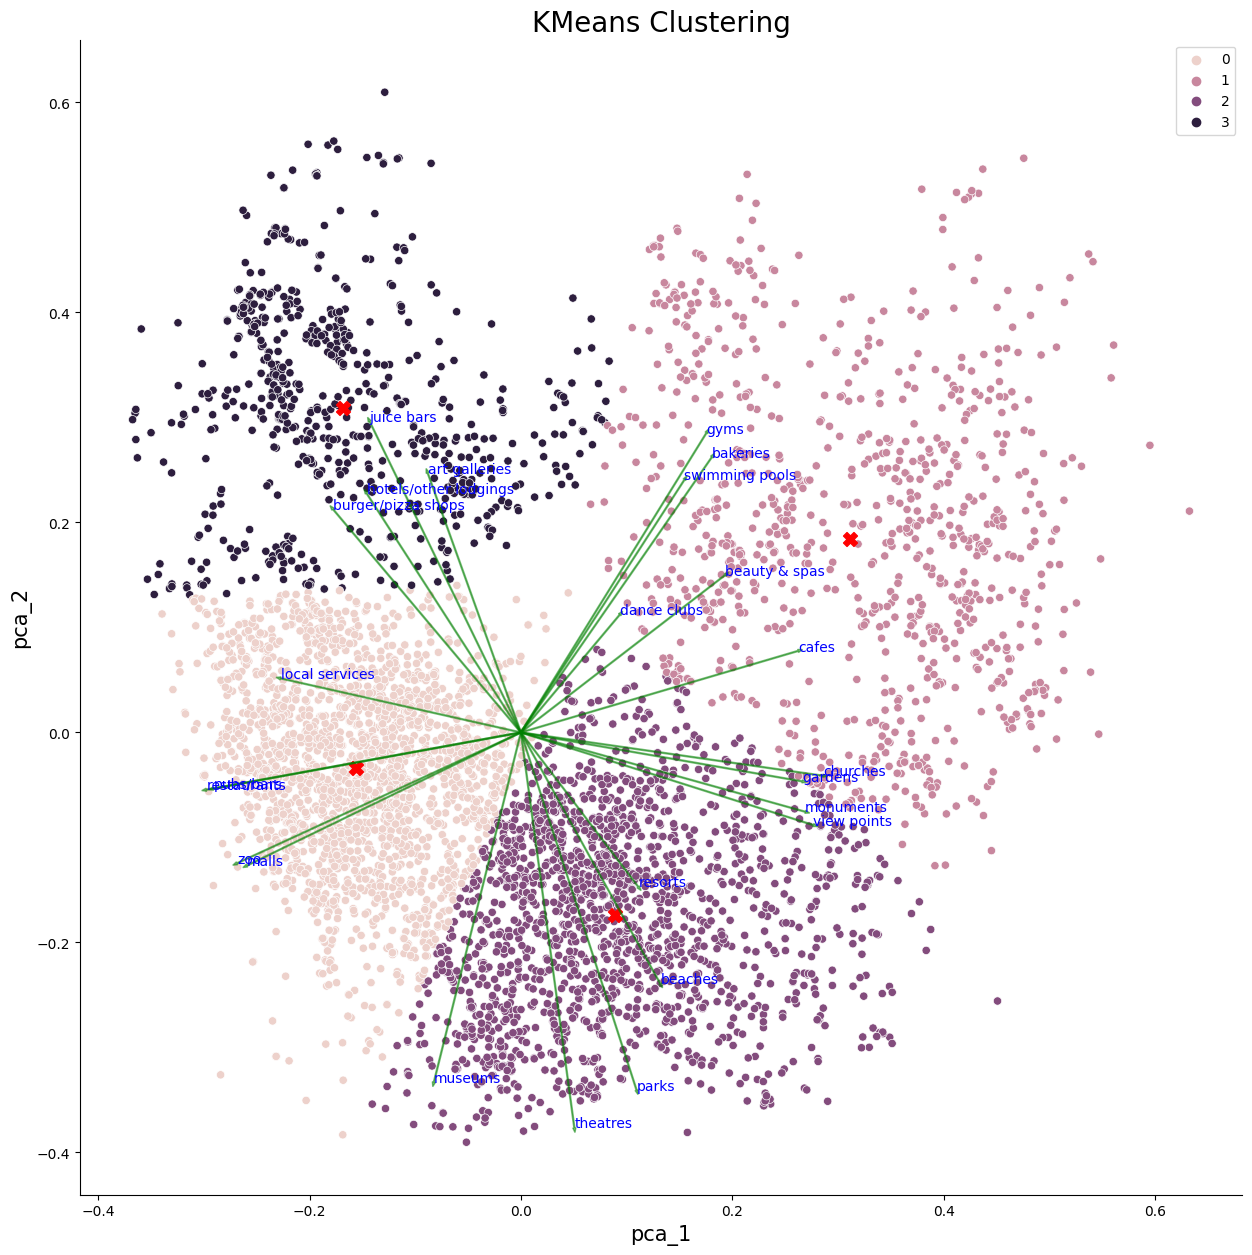

In [ ]:
pca_1=reviews_scaled_pca_df[:,0]
pca_2=reviews_scaled_pca_df[:,1]

scaled_pca_1 = 1.0/(pca_1.max() - pca_1.min())
scaled_pca_2 = 1.0/(pca_2.max() - pca_2.min())

plt.subplots(figsize=(15, 15))

sc_plt=sns.scatterplot(x = pca_1*scaled_pca_1, y = pca_2*scaled_pca_2,hue = cluster)
plt.scatter(kmeans_model.cluster_centers_[:,0]*scaled_pca_1,
           kmeans_model.cluster_centers_[:,1]*scaled_pca_2, c = 'red', s = 100, marker = 'X')

coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
columns = list(cat_df.columns)

for i in range(n):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'g',alpha = 0.5)
    plt.text(coeff[i,0], coeff[i,1], columns[i],color = 'blue')
    
    
sns.despine()
sc_plt.set_xlabel('pca_1', fontsize = 15)
sc_plt.set_ylabel('pca_2', fontsize = 15)
sc_plt.set_title('KMeans Clustering', fontsize = 20)
plt.show()

It can be seen that we have obtained 4 clusters where,

cluster 0: local services,zoo, malls,pubs/bars,restaurants (users who prefer activities)

cluster 1: gyms, bakeries, swimming pools, dance clubs, beauty & spas, cafes, churches,gardens (users who prefer healthy lifestyle)

cluster 2: monuments,viewpoints,resorts,beaches,parks,theatres,museums (users who prefer nature)

cluster 3: juice bars, art galleries, hotels/other lodgings, burger/ pizza shops (users who prefer food and love art)



---



The data has no target categories. Therfore target high level categories need to be determined based on the categories.

category 0: cluster_0 (local services,zoo, malls,pubs/bars,restaurants )

category 1: cluster_1 (gyms, bakeries, swimming pools, dance clubs, beauty & spas, cafes, churches,gardens) 

category 2: cluster_2 (monuments,viewpoints,resorts,beaches,parks,theatres,museums) 

catgeory 3: cluster_3 (juice bars, art galleries, hotels/other lodgings, burger/ pizza shops) 

In [ ]:
cluster_0=['local services','zoo','malls','pubs/bars','restaurants']
cluster_1=['gyms','bakeries','swimming pools','dance clubs','beauty & spas','cafes','churches','gardens']
cluster_2=['monuments','viewpoints','resorts','beaches','parks','theatres','museums']
cluster_3=['juice bars','art galleries','hotels/other lodgings','burger/pizza shops']

In [ ]:
category_df=pd.DataFrame(0, index=np.arange(len(reviews_df)),columns=['cluster_0','cluster_1','cluster_2','cluster_3'])

In [ ]:
for index,row in reviews_df.iterrows():
  for col in reviews_df.columns[1:]:
    match col:
      case col if col in cluster_0:
        category_df.loc[index,'cluster_0']+=row[col]
      case col if col in cluster_1:
        category_df.loc[index,'cluster_1']+=row[col]
      case col if col in cluster_2:
        category_df.loc[index,'cluster_2']+=row[col]
      case col if col in cluster_3:
        category_df.loc[index,'cluster_3']+=row[col]

category_df

,cluster_0,cluster_1,cluster_2,cluster_3
0,14.02,1.59,15.20,6.85
1,14.32,1.59,15.20,6.85
2,14.31,1.59,15.18,6.85
3,14.05,1.59,15.68,6.85
4,14.31,1.59,15.18,6.85
...,...,...,...,...
5451,7.35,11.18,22.13,8.64
5452,6.63,8.23,22.16,4.47
5453,6.54,10.78,22.18,4.20
5454,6.48,10.81,21.14,8.27


In [ ]:
reviews_df['Category']=category_df.apply(lambda row: row.idxmax(),axis=1)

<Axes: >

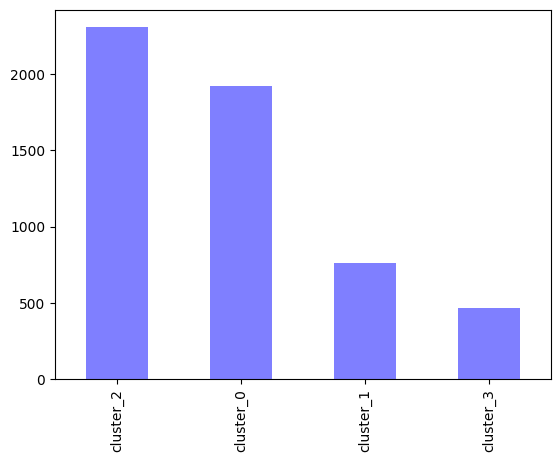

In [ ]:
reviews_df['Category'].value_counts().plot(kind='bar',color='blue',alpha=0.5)



---



Classification with Decision Trees

In [ ]:
le=LabelEncoder()
reviews_df['Category_c']=le.fit_transform(reviews_df['Category'])

In [ ]:
reviews_df['Category_c'].value_counts()

2    2305
0    1923
1     762
3     466
Name: Category_c, dtype: int64

In [ ]:
X=reviews_df.drop(['user_id','Category','Category_c'],axis=1)
y=reviews_df['Category_c']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4364, 24), (1092, 24), (4364,), (1092,))

In [ ]:
dtc_params={
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6,8,10,12],
    'splitter' :['best', 'random']
}

In [ ]:
dtc_GS=GridSearchCV(DecisionTreeClassifier(),dtc_params,cv=10,scoring='accuracy')
dtc_GS.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print(dtc_GS.best_estimator_)
print(dtc_GS.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, splitter='random')
0.9385982407154703


In [ ]:
DTC=DecisionTreeClassifier(criterion='entropy', max_depth=10, splitter='random')
DTC.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, splitter='random')

In [ ]:
dtc_predictions=DTC.predict(X_test)
print(classification_report(y_test, dtc_predictions))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93       372
           1       0.83      0.95      0.89       149
           2       0.96      0.88      0.92       465
           3       0.95      0.93      0.94       106

    accuracy                           0.92      1092
   macro avg       0.91      0.93      0.92      1092
weighted avg       0.92      0.92      0.92      1092



<Axes: >

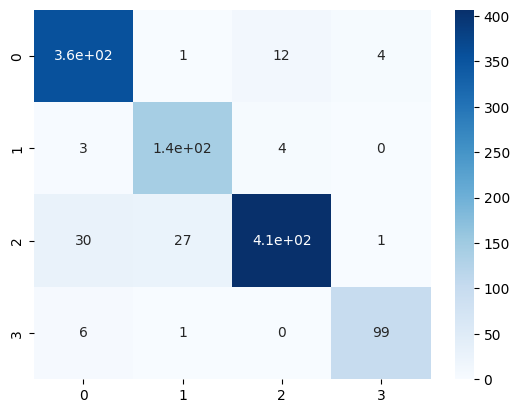

In [ ]:
#visualize confusion matrix
confusion_mat = confusion_matrix(y_test, dtc_predictions)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')

Trying out different test sizes

In [ ]:
for test_size in [0.1, 0.25, 0.3,0.4]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=42)
    dtc_clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, splitter='random')
    dtc_clf.fit(X_train, y_train)
    dtc_predictions = dtc_clf.predict(X_test)
    print('\nTest size: %f' %test_size) 
    print('Accuracy: %f' %accuracy_score(y_test,  dtc_predictions ))
    print(classification_report(y_test,  dtc_predictions ))


Test size: 0.100000
Accuracy: 0.913919
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       188
           1       0.84      0.94      0.89        69
           2       0.93      0.89      0.91       240
           3       0.98      0.96      0.97        49

    accuracy                           0.91       546
   macro avg       0.91      0.93      0.92       546
weighted avg       0.92      0.91      0.91       546


Test size: 0.250000
Accuracy: 0.931818
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       472
           1       0.92      0.92      0.92       184
           2       0.94      0.92      0.93       582
           3       0.95      0.96      0.96       126

    accuracy                           0.93      1364
   macro avg       0.93      0.94      0.94      1364
weighted avg       0.93      0.93      0.93      1364


Test size: 0.300000
Accuracy: 0.927306
          

The optimal test size is 0.25 which gives 93% accuracy.

Classification with K-Nearest Neighbours

In [ ]:
knn_params={
    'n_neighbors':[2,3,4,5,6,7,8,9, 10],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute']
}

In [ ]:
knn_GS=GridSearchCV(KNeighborsClassifier(),knn_params,cv=10,scoring='accuracy')
knn_GS.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(knn_GS.best_estimator_)
print(knn_GS.best_score_)

KNeighborsClassifier(n_neighbors=3, weights='distance')
0.9608954277616171


In [ ]:
KNN=KNeighborsClassifier(n_neighbors=3, weights='distance')
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
knn_predictions=KNN.predict(X_test)
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       764
           1       0.94      0.98      0.96       302
           2       0.96      0.95      0.96       925
           3       0.95      0.97      0.96       192

    accuracy                           0.95      2183
   macro avg       0.95      0.96      0.96      2183
weighted avg       0.95      0.95      0.95      2183



<Axes: >

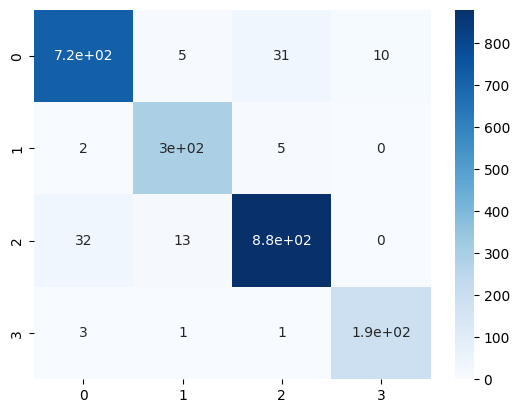

In [ ]:
#visualize confusion matrix
confusion_mat = confusion_matrix(y_test, knn_predictions)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')

Trying out different test sizes

In [ ]:
for test_size in [0.1, 0.25, 0.3,0.4]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=42)
    knn_clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
    knn_clf.fit(X_train, y_train)
    knn_predictions = knn_clf.predict(X_test)
    print('\nTest size: %f' %test_size) 
    print('Accuracy: %f' %accuracy_score(y_test,  knn_predictions ))
    print(classification_report(y_test,  knn_predictions ))


Test size: 0.100000
Accuracy: 0.967033
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       188
           1       0.96      0.99      0.97        69
           2       0.98      0.96      0.97       240
           3       0.98      0.96      0.97        49

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546


Test size: 0.250000
Accuracy: 0.959677
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       472
           1       0.96      0.97      0.96       184
           2       0.97      0.95      0.96       582
           3       0.98      0.98      0.98       126

    accuracy                           0.96      1364
   macro avg       0.96      0.97      0.96      1364
weighted avg       0.96      0.96      0.96      1364


Test size: 0.300000
Accuracy: 0.952963
          

The optimal test size would be 0.1 which gives accuracy of 97%.

Classification using SVM

In [ ]:
svm_params={
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf','linear','poly','sigmoid']
}

In [ ]:
svm_GS=GridSearchCV(SVC(),svm_params,cv=10,scoring='accuracy')
svm_GS.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             scoring='accuracy')

In [ ]:
print(svm_GS.best_estimator_)
print(svm_GS.best_score_)

SVC(C=1, gamma=1, kernel='linear')
0.989616431714776


In [ ]:
SVM=SVC(C=1, gamma=1, kernel='linear')
SVM.fit(X_train,y_train)

SVC(C=1, gamma=1, kernel='linear')

In [ ]:
svm_predictions=SVM.predict(X_test)
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       764
           1       0.97      0.99      0.98       302
           2       0.99      0.99      0.99       925
           3       1.00      0.97      0.99       192

    accuracy                           0.99      2183
   macro avg       0.99      0.99      0.99      2183
weighted avg       0.99      0.99      0.99      2183



<Axes: >

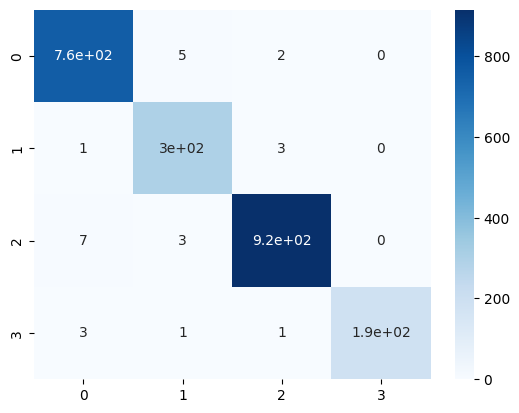

In [ ]:
#visualize confusion matrix
confusion_mat = confusion_matrix(y_test, svm_predictions)
sns.heatmap(confusion_mat, annot=True, cmap='Blues')

Trying out different test sizes

In [ ]:
for test_size in [0.1, 0.25, 0.3,0.4]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,random_state=42)
    svm_clf = SVC(C=1, gamma=1, kernel='linear')
    svm_clf.fit(X_train, y_train)
    svm_predictions = svm_clf.predict(X_test)
    print('\nTest size: %f' %test_size) 
    print('Accuracy: %f' %accuracy_score(y_test,  svm_predictions ))
    print(classification_report(y_test,  svm_predictions ))


Test size: 0.100000
Accuracy: 0.983516
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       188
           1       0.97      0.97      0.97        69
           2       0.99      0.98      0.99       240
           3       0.98      0.96      0.97        49

    accuracy                           0.98       546
   macro avg       0.98      0.98      0.98       546
weighted avg       0.98      0.98      0.98       546


Test size: 0.250000
Accuracy: 0.991202
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       472
           1       0.98      0.99      0.98       184
           2       1.00      0.99      0.99       582
           3       0.99      0.98      0.98       126

    accuracy                           0.99      1364
   macro avg       0.99      0.99      0.99      1364
weighted avg       0.99      0.99      0.99      1364


Test size: 0.300000
Accuracy: 0.989615
          

test size 0.25 give optimal accuracy of 99%